In [3]:
from data import get_loader, test_dataset
from options import opt
import torch.backends.cudnn as cudnn
import logging
from tensorboardX import SummaryWriter
from utils import clip_gradient, adjust_lr
from models.BBSNet_model import BBSNet
from torchvision.utils import make_grid
from datetime import datetime
import numpy as np
import os
import torch
import torch.nn.functional as F
import sys
sys.path.append('./models')

from BBSNet_train import *
from utils import evaluate, draw_curve

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Train

In [ ]:
# setup_gpu()
# model, optimizer, CE = get_model()
# train_loader, test_loader, total_step = get_data()
# main(optimizer, model, train_loader, test_loader, CE, total_step)

# Use Trained Model

In [2]:
evaluate()

Eval [Dataset_1] Dataset [Fmeasure] with [Method_1] Method.


100%|██████████| 16/16 [00:01<00:00,  8.98it/s]




Eval [Dataset_1] Dataset [MAE] with [Method_1] Method.


100%|██████████| 16/16 [00:00<00:00, 432.22it/s]




Eval [Dataset_1] Dataset [Smeasure] with [Method_1] Method.


100%|██████████| 16/16 [00:00<00:00, 179.78it/s]




Eval [Dataset_1] Dataset [Emeasure] with [Method_1] Method.


100%|██████████| 16/16 [00:00<00:00, 16.10it/s]




Eval [Dataset_1] Dataset [Fbw_measure] with [Method_1] Method.


100%|██████████| 16/16 [00:00<00:00, 51.90it/s]




[cost:3.2252s][Dataset_1 Dataset] [Method_1 Method] 0.0217 mae, 0.9218 max-fmeasure, 0.9017 mean-fmeasure, 0.8951 adp-fmeasure, 0.9737 max-Emeasure, 0.9646 mean-Emeasure, 0.9706 adp-Emeasure, 0.9262 S-measure_alpha05, 0.8753 Fbw-measure

Eval [Dataset_1] Dataset [Fmeasure] with [Method_2] Method.


100%|██████████| 16/16 [00:00<00:00, 43.69it/s]




Eval [Dataset_1] Dataset [MAE] with [Method_2] Method.


100%|██████████| 16/16 [00:00<00:00, 307.06it/s]




Eval [Dataset_1] Dataset [Smeasure] with [Method_2] Method.


100%|██████████| 16/16 [00:00<00:00, 196.52it/s]




Eval [Dataset_1] Dataset [Emeasure] with [Method_2] Method.


100%|██████████| 16/16 [00:01<00:00, 15.73it/s]




Eval [Dataset_1] Dataset [Fbw_measure] with [Method_2] Method.


100%|██████████| 16/16 [00:00<00:00, 58.21it/s]




[cost:1.8111s][Dataset_1 Dataset] [Method_2 Method] 0.0205 mae, 0.9314 max-fmeasure, 0.9134 mean-fmeasure, 0.9077 adp-fmeasure, 0.9814 max-Emeasure, 0.9667 mean-Emeasure, 0.9763 adp-Emeasure, 0.9383 S-measure_alpha05, 0.8927 Fbw-measure

Eval [Dataset_2] Dataset [Fmeasure] with [Method_1] Method.


100%|██████████| 16/16 [00:00<00:00, 23.72it/s]




Eval [Dataset_2] Dataset [MAE] with [Method_1] Method.


100%|██████████| 16/16 [00:00<00:00, 216.86it/s]




Eval [Dataset_2] Dataset [Smeasure] with [Method_1] Method.


100%|██████████| 16/16 [00:00<00:00, 106.95it/s]




Eval [Dataset_2] Dataset [Emeasure] with [Method_1] Method.


100%|██████████| 16/16 [00:02<00:00,  6.72it/s]




Eval [Dataset_2] Dataset [Fbw_measure] with [Method_1] Method.


100%|██████████| 16/16 [00:00<00:00, 22.40it/s]




[cost:4.0062s][Dataset_2 Dataset] [Method_1 Method] 0.0555 mae, 0.8689 max-fmeasure, 0.8571 mean-fmeasure, 0.8621 adp-fmeasure, 0.9237 max-Emeasure, 0.9074 mean-Emeasure, 0.9234 adp-Emeasure, 0.8581 S-measure_alpha05, 0.8449 Fbw-measure

Eval [Dataset_2] Dataset [Fmeasure] with [Method_2] Method.


100%|██████████| 16/16 [00:00<00:00, 24.37it/s]




Eval [Dataset_2] Dataset [MAE] with [Method_2] Method.


100%|██████████| 16/16 [00:00<00:00, 151.91it/s]




Eval [Dataset_2] Dataset [Smeasure] with [Method_2] Method.


100%|██████████| 16/16 [00:00<00:00, 153.38it/s]




Eval [Dataset_2] Dataset [Emeasure] with [Method_2] Method.


100%|██████████| 16/16 [00:02<00:00,  6.89it/s]




Eval [Dataset_2] Dataset [Fbw_measure] with [Method_2] Method.


100%|██████████| 16/16 [00:00<00:00, 22.67it/s]



[cost:3.9065s][Dataset_2 Dataset] [Method_2 Method] 0.0435 mae, 0.8927 max-fmeasure, 0.8842 mean-fmeasure, 0.8891 adp-fmeasure, 0.9542 max-Emeasure, 0.9456 mean-Emeasure, 0.9523 adp-Emeasure, 0.8939 S-measure_alpha05, 0.8729 Fbw-measure



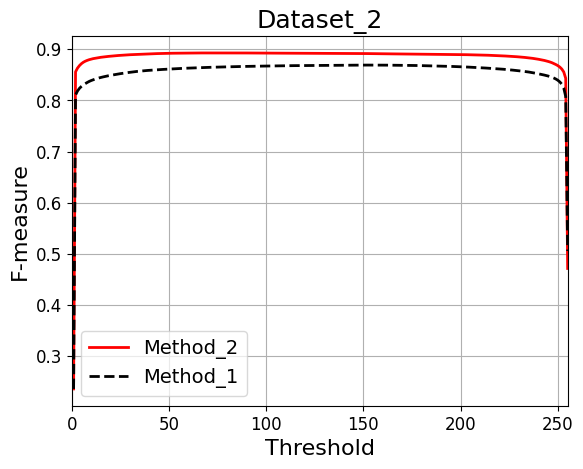

In [4]:
draw_curve()